In [1]:
from IPython.core.display import Image
Image(url= "https://upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Olympic_rings_without_rims.svg/1920px-Olympic_rings_without_rims.svg.png", width=650, height=650)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
id1 = "207277526"
id2 = "208005454"
id3 = "316080159"
id4 = "315338582"
d =({'ID':[id1,id2,id3,id4],'Names':['Celin Mirilashvili','Alon Ankin','Dor Ingber','Itai Bekenshtein']})
pd.DataFrame.from_dict(d)


,ID,Names
0,207277526,Celin Mirilashvili
1,208005454,Alon Ankin
2,316080159,Dor Ingber
3,315338582,Itai Bekenshtein


- Reading the data using 'panda' libary,and dataframe as 'csv' file

In [4]:
AI_project = pd.read_csv('Summer-Olympic-medals-1976-to-2008.csv', encoding='latin-1')
AI_project.head()


,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


## Preprocessing the data:

### Treat missing values

- Check if there are missing values:

In [58]:
AI_project.isnull().sum().sort_values(ascending=False)

Medal           0
Event_gender    0
Country         0
Country_Code    0
Gender          0
Athlete         0
Event           0
Discipline      0
Sport           0
Year            0
City            0
dtype: int64

- We have 117 missing values in the data we will remove rows with missing values according to parameters with 'dropna'

In [6]:
AI_project=AI_project.dropna()
AI_project.isnull().sum().sort_values(ascending=False)

Medal           0
Event_gender    0
Country         0
Country_Code    0
Gender          0
Athlete         0
Event           0
Discipline      0
Sport           0
Year            0
City            0
dtype: int64

### Fixing data types
- Check if any of the data types need to be fixed:

In [7]:
AI_project.dtypes

City             object
Year            float64
Sport            object
Discipline       object
Event            object
Athlete          object
Gender           object
Country_Code     object
Country          object
Event_gender     object
Medal            object
dtype: object

- As we can see all the data contains string value except the "Year" column,we changed the "Year" column from float to int because year is a natural number

In [8]:
AI_project['Year'] = AI_project['Year'].astype(int)  
AI_project.dtypes

City            object
Year             int32
Sport           object
Discipline      object
Event           object
Athlete         object
Gender          object
Country_Code    object
Country         object
Event_gender    object
Medal           object
dtype: object

### Women participaints growth in the olympic trough the Years
- We wanted to check the growth in women participaints in the olympic trough the years.
 so we made a new data frame which contains the amount of men and women that won medal in each olympic and the ratio between them.

In [9]:
CHECK_M_F = AI_project.copy()
Gender_df = pd.get_dummies(CHECK_M_F['Gender'])#Makes gender numeric
CHECK_M_F = pd.concat([CHECK_M_F,Gender_df],axis=1)#concat between 2 data frames
Men_Woman_df = CHECK_M_F.pivot_table(['Men','Women'],'Year',aggfunc='sum')#creat a new data frame with the winners in each olyimpic separated by gender
participaints = Men_Woman_df
men_ratio=((Men_Woman_df['Men'] / Men_Woman_df['Men'].sum()) * 100)#Calculate ratio men
women_ratio = ((Men_Woman_df['Women'] / Men_Woman_df['Women'].sum()) * 100)#Calculate ratio women
men_ratio = pd.concat([men_ratio,women_ratio],axis=1)
men_ratio=men_ratio.rename(columns={"Men": "Ratio Men", "Women": "Ratio Women"})
Men_Woman_df = pd.concat([participaints,men_ratio],axis=1)
Men_Woman_df

,Men,Women,Ratio Men,Ratio Women
Year,,,,
1976,924.0,381.0,9.842352,6.427126
1980,958.0,429.0,10.204516,7.236842
1984,973.0,486.0,10.364295,8.198381
1988,1011.0,535.0,10.769067,9.024966
1992,1105.0,600.0,11.770345,10.121457
1996,1082.0,777.0,11.525352,13.107287
2000,1126.0,889.0,11.994035,14.996626
2004,1099.0,899.0,11.706434,15.165317
2008,1110.0,932.0,11.823605,15.721997


### Plots for the Number of winners in each olympic and the ratio of winners in each olympic

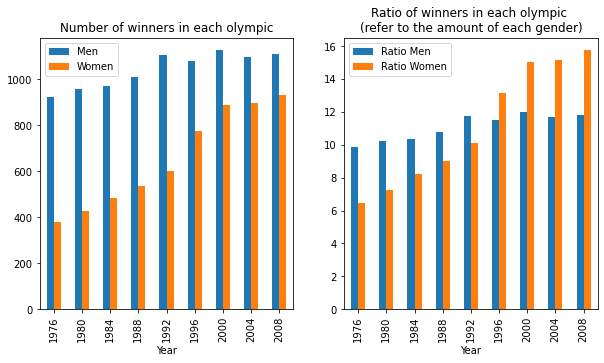

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2)
participaints.plot.bar(ax=axes[0],figsize=(10,5))#Amount of Winners
axes[0].set_title("Number of winners in each olympic")
axes[1].set_title("Ratio of winners in each olympic \n(refer to the amount of each gender)")
men_ratio.plot.bar(ax=axes[1],figsize=(10,5))#Ratio of Winners


#### Conclusion 1: as we can see in the dataframe and the plots the number of winners among women is incrasing each olympic, that refer to the equal rights for both men and women through the years,and shows the reduction of gaps between the genders.

- With the increase in the number of events for women, changes have taken place in the participation of women in the Olympic movement, new branches and events have been added to the Olympic Games,now we will present the increase in the number of women:

- We chose a visual presentation by subplots to show visibly changes

<ipython-input-11-e2c2f34ab285>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men['m_Gender'] = 1
<ipython-input-11-e2c2f34ab285>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women['w_Gender'] = 1


Text(0.5, 1.0, 'Women winners by sport type')

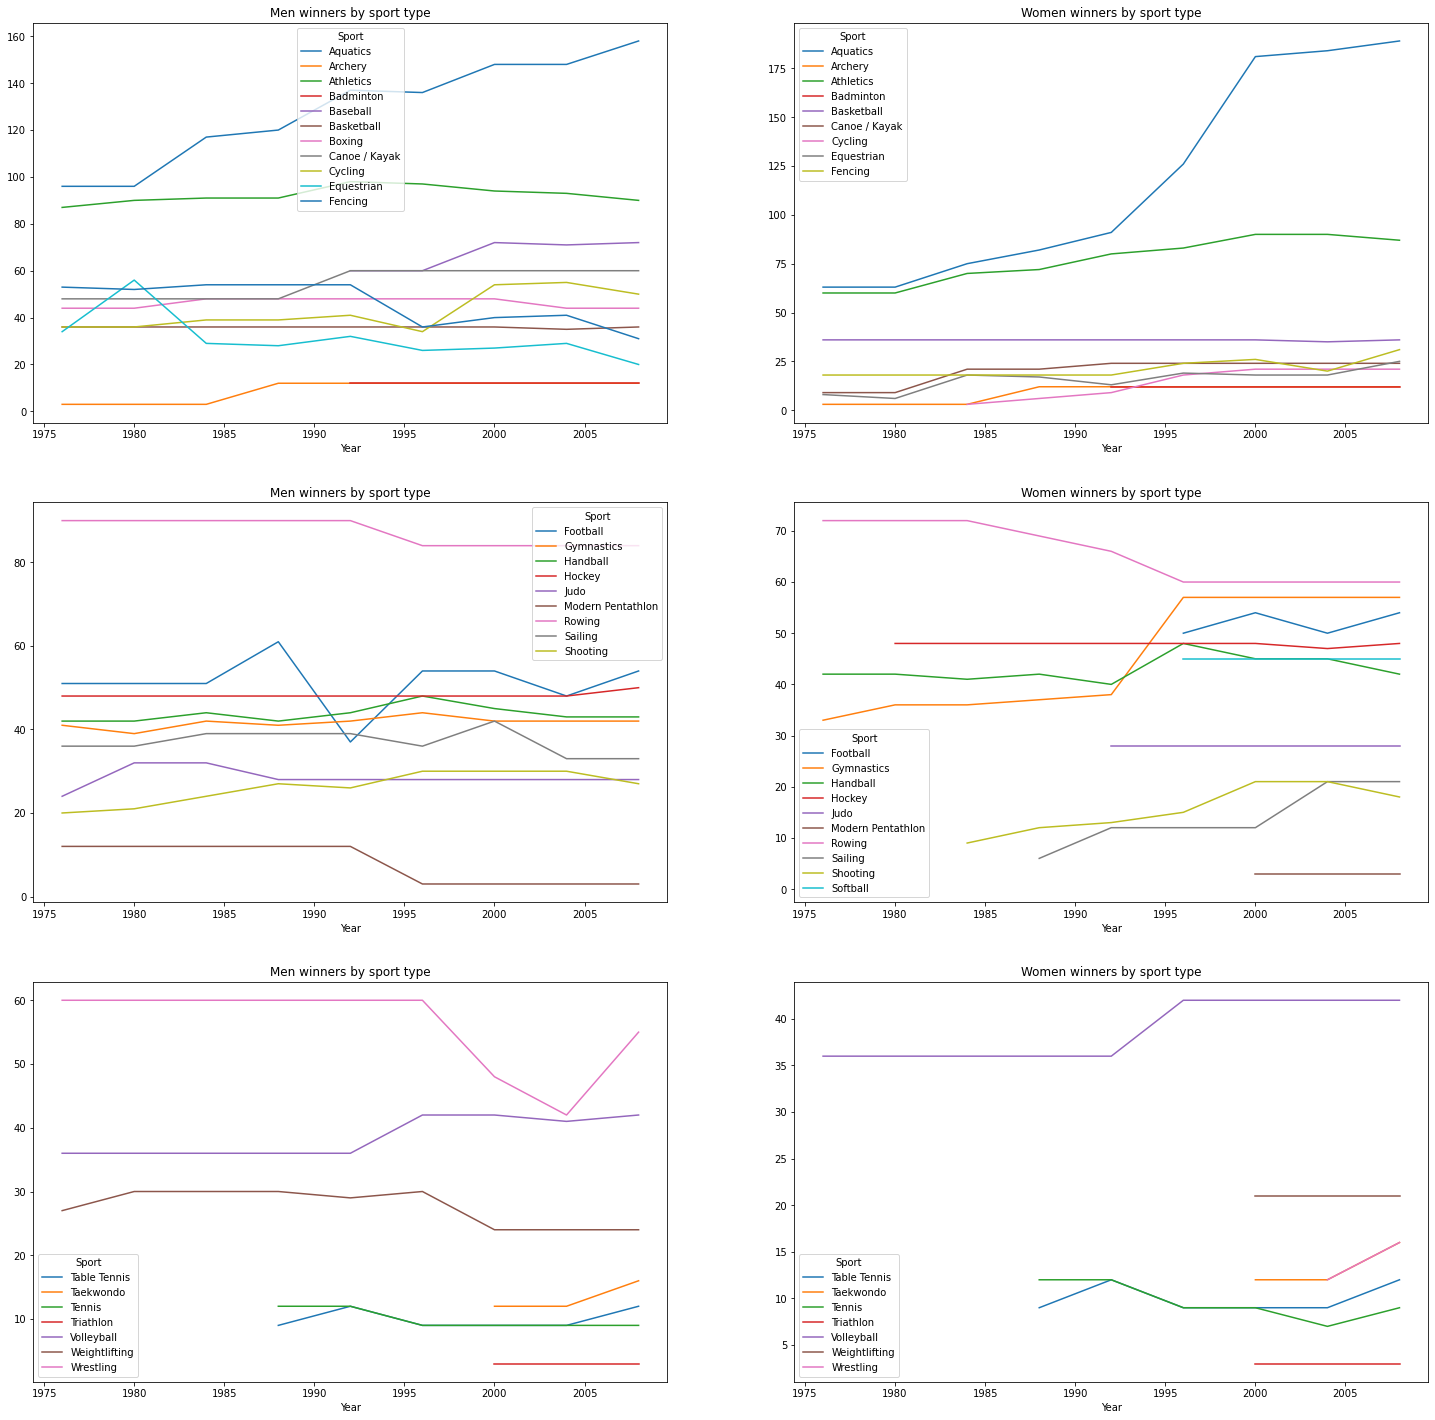

In [11]:
#gender_group = AI_project.groupby(['Sport','Year', 'Gender']).size().unstack()
fig, axes = plt.subplots(nrows=3, ncols=2)
# sns.lineplot(data = gender_group1, x = 'Year', y = 'Women', hue = 'Sport', style="Sport", markers=True, dashes=False)
men = AI_project[AI_project.Gender == 'Men']
women = AI_project[AI_project.Gender == 'Women']
men['m_Gender'] = 1
women['w_Gender'] = 1
x = men.pivot_table('m_Gender',index='Year',columns='Sport',aggfunc=lambda x: x.sum(axis=0))
y = women.pivot_table('w_Gender',index='Year',columns='Sport',aggfunc=lambda x: x.sum(axis=0))
x.loc[:,"Aquatics":"Fencing"].plot(ax=axes[0][0],figsize=(25,25)).set_title("Men winners by sport type")
y.loc[:,"Aquatics":"Fencing"].plot(ax=axes[0][1],figsize=(25,25)).set_title("Women winners by sport type")
x.loc[:,"Football":"Softball"].plot(ax=axes[1][0],figsize=(25,25)).set_title("Men winners by sport type")
y.loc[:,"Football":"Softball"].plot(ax=axes[1][1],figsize=(25,25)).set_title("Women winners by sport type")
x.loc[:,"Table Tennis":"Wrestling"].plot(ax=axes[2][0],figsize=(25,25)).set_title("Men winners by sport type")
y.loc[:,"Table Tennis":"Wrestling"].plot(ax=axes[2][1],figsize=(25,25)).set_title("Women winners by sport type")


#### Conclusion 2 following the graphs: In 1991, the International Olympic Committee decided that any new competition entering the Olympics should involve women. We see a large growth in the number of women's competitions at the Olympics that came after the decision. A significant increase can be seen in aquaticts where mens increase was moderate. In gymnastics we see a significant increase that in men was not at all. In addition, we really can see that every type of sport that enters after the decision is opened to women and men alike (taekwondo, triathlon ...) We also see a lot of sports that is only for men gradually entered also for women after 1991 (judo, football, weightlifting etc ..)

- Plots prepresenting the Conclusions:

Text(0.5, 1.0, 'Weightlifting through the years')

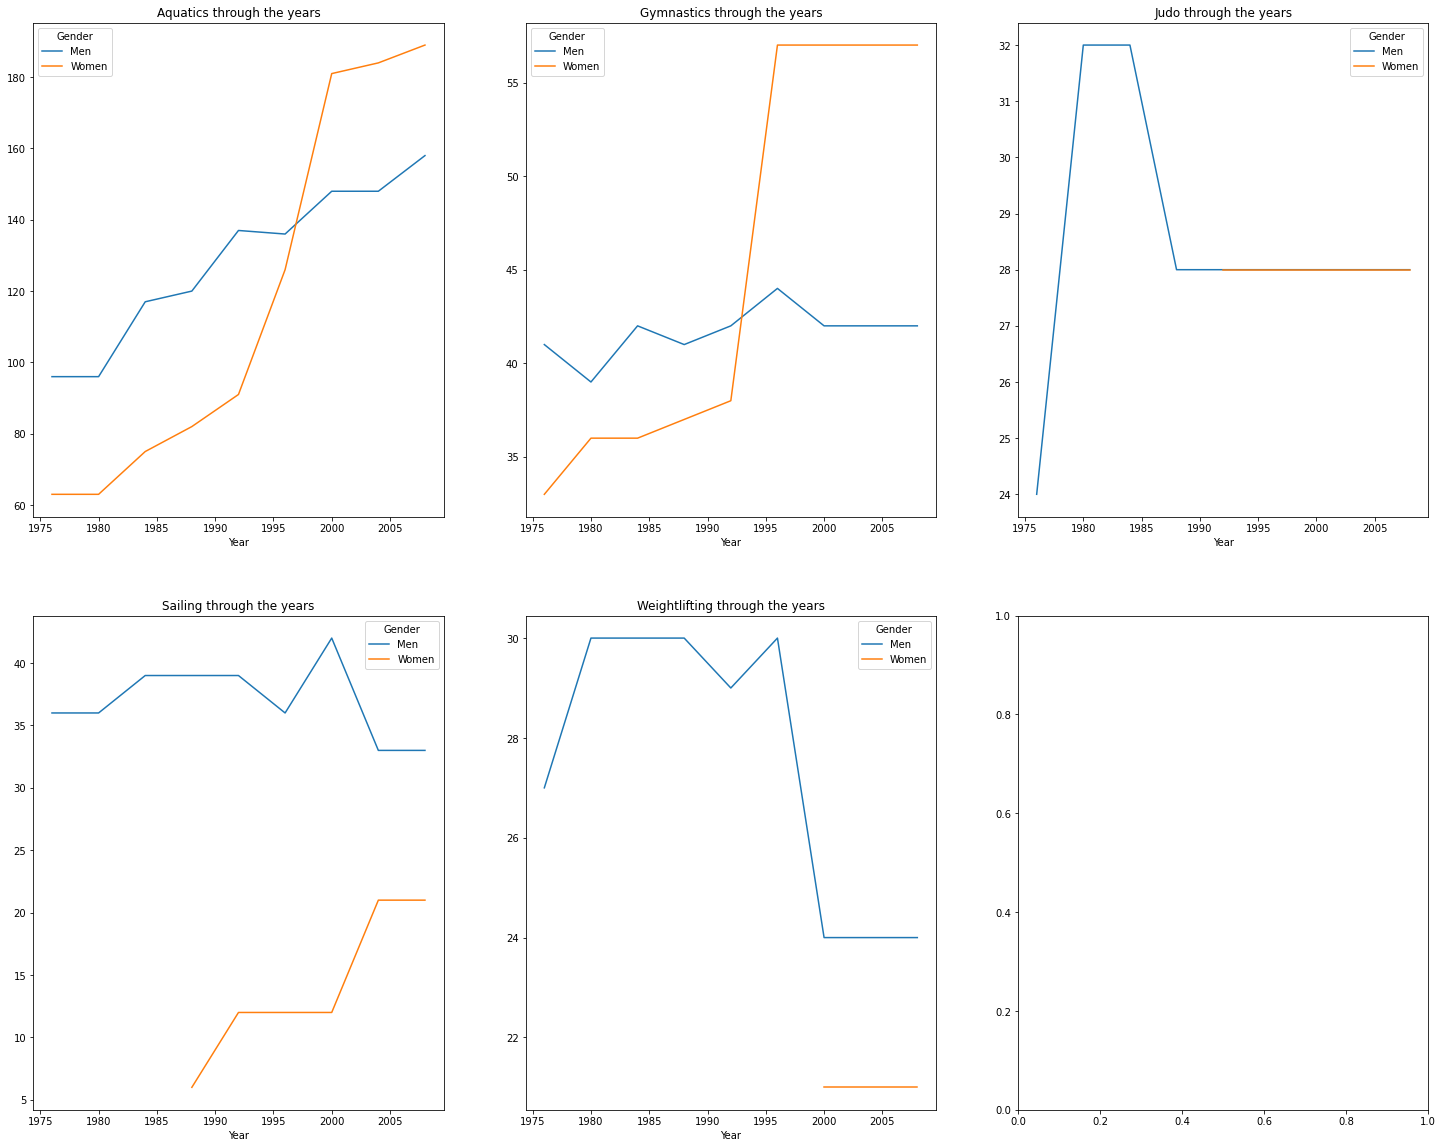

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=3)
AI_project[AI_project.Sport == 'Aquatics'].groupby(['Year', 'Gender']).size().unstack().plot(ax=axes[0][0],figsize=(25,20)).set_title("Aquatics through the years")
AI_project[AI_project.Sport == 'Gymnastics'].groupby(['Year', 'Gender']).size().unstack().plot(ax=axes[0][1],figsize=(25,20)).set_title("Gymnastics through the years")
AI_project[AI_project.Sport == 'Judo'].groupby(['Year', 'Gender']).size().unstack().plot(ax=axes[0][2],figsize=(25,20)).set_title("Judo through the years")
AI_project[AI_project.Sport == 'Sailing'].groupby(['Year', 'Gender']).size().unstack().plot(ax=axes[1][0],figsize=(25,20)).set_title("Sailing through the years")
AI_project[AI_project.Sport == 'Weightlifting'].groupby(['Year', 'Gender']).size().unstack().plot(ax=axes[1][1],figsize=(25,20)).set_title("Weightlifting through the years")


In [13]:
from IPython.core.display import Image
Image(url= "https://runpanel.co.il/wp-content/uploads/2018/02/image1-9-759x500.jpg", width=650, height=650)

### We want to find a connection between the host country and the number of wins in that Olympics 

- We will start by presenting the cities where the Olympics took place

In [14]:
Sum_Of_Medals=AI_project['City'].value_counts()
Sum_Of_Medals

Beijing        2042
Sydney         2015
Athens         1998
Atlanta        1859
Barcelona      1705
Seoul          1546
Los Angeles    1459
Moscow         1387
Montreal       1305
Name: City, dtype: int64

Therefore we know that the host countries are: Canada, Russia, USA, South Korea, Spain, USA, Australia, Greece, China

- We will create two lists: the first one- the countries where the Olympics took place.
And the second - the number/amount of medals won in each Olympics respectively

In [15]:
Sum_Of_Medals_lst = [1305,1387,1459,1546,1705,1859,2015,1998,2042]
Country_lst = ['Canada','Soviet Union','United States','Korea, South','Spain','United States','Australia','Greece','China']

- Now we will create a new data frame, which will show the number of medals won by each country that hosted the Olympics over the years, and the number of medals they won at that Olympics.

In [16]:
Home_A_df = AI_project.copy()
temp_Home_A_df= pd.get_dummies(Home_A_df['Country'])
Home_A_df = pd.concat([Home_A_df,temp_Home_A_df,],axis=1)
Home_A_df = Home_A_df.pivot_table(['United States','Australia','China','Korea, South','Spain','Canada','Soviet Union','Greece'],'Year',aggfunc='sum')
#using 'assign' function to use the lists by assigning value to the variable, then the assignment takes place in the currently active environment.
Home_A_df = Home_A_df.assign(Sum_Of_Medals = Sum_Of_Medals_lst,Country = Country_lst)
Home_A_df = Home_A_df[['Country','Sum_Of_Medals','Australia','Canada','China','Greece','Korea, South','Soviet Union','Spain','United States']]
Home_A_df

,Country,Sum_Of_Medals,Australia,Canada,China,Greece,"Korea, South",Soviet Union,Spain,United States
Year,,,,,,,,,,
1976,Canada,1305,24,20,0,0,17,285.0,6,155.0
1980,Soviet Union,1387,12,0,0,5,0,442.0,24,0.0
1984,United States,1459,50,86,76,2,42,0.0,19,333.0
1988,"Korea, South",1546,34,21,53,1,77,294.0,5,193.0
1992,Spain,1705,57,44,83,2,49,0.0,66,224.0
1996,United States,1859,132,51,110,8,66,0.0,67,260.0
2000,Australia,2015,183,31,79,18,73,0.0,43,248.0
2004,Greece,1998,157,17,94,31,52,0.0,27,264.0
2008,China,2042,149,34,184,7,78,0.0,71,315.0


- We tested the ratio of the number of medals won by each country hosted according to the number of medals won in that year.then we created a data frame that contained the related ratios so we could test the home advantage.

In [17]:
Home_A_Ratio = Home_A_df.copy()
Home_A_Ratio_temp = Home_A_Ratio.loc[:,'Country']
ratio_Australia=((Home_A_Ratio['Australia'] / Home_A_Ratio['Sum_Of_Medals']) * 100)
ratio_Canada = ((Home_A_Ratio['Canada'] / Home_A_Ratio['Sum_Of_Medals']) * 100)
ratio_China = ((Home_A_Ratio['China'] / Home_A_Ratio['Sum_Of_Medals']) * 100)
ratio_Greece = ((Home_A_Ratio['Greece'] / Home_A_Ratio['Sum_Of_Medals']) * 100)
ratio_KoreaSouth = ((Home_A_Ratio['Korea, South'] / Home_A_Ratio['Sum_Of_Medals']) * 100)
ratio_Soviet_Union = ((Home_A_Ratio['Soviet Union'] / Home_A_Ratio['Sum_Of_Medals']) * 100)
ratio_Spain = ((Home_A_Ratio['Spain'] / Home_A_Ratio['Sum_Of_Medals']) * 100)
ratio_United_States = ((Home_A_Ratio['United States'] / Home_A_Ratio['Sum_Of_Medals']) * 100)
ratio = pd.concat([ratio_Australia,ratio_Canada,ratio_China,ratio_Greece,ratio_KoreaSouth,ratio_Soviet_Union,ratio_Spain,ratio_United_States],axis=1)
ratio=ratio.rename(columns={0:"Ratio Australia",1: "Ratio Canada",2: "Ratio China",3: "Ratio Greece",4: "Ratio Korea, South",5: "Ratio Soviet Union",6: "Ratio Spain",7: "Ratio United States"})
year = [1976,1980,1984,1988,1992,1996,2000,2004,2008]
Home_A_Ratio = pd.concat([Home_A_Ratio_temp,ratio],axis=1)
Home_A_Ratio["Year"] = year#in order to make a plot
Home_A_Ratio

,Country,Ratio Australia,Ratio Canada,Ratio China,Ratio Greece,"Ratio Korea, South",Ratio Soviet Union,Ratio Spain,Ratio United States,Year
Year,,,,,,,,,,
1976,Canada,1.839080,1.532567,0.000000,0.000000,1.302682,21.839080,0.459770,11.877395,1976
1980,Soviet Union,0.865177,0.000000,0.000000,0.360490,0.000000,31.867340,1.730353,0.000000,1980
1984,United States,3.427005,5.894448,5.209047,0.137080,2.878684,0.000000,1.302262,22.823852,1984
1988,"Korea, South",2.199224,1.358344,3.428202,0.064683,4.980595,19.016818,0.323415,12.483829,1988
1992,Spain,3.343109,2.580645,4.868035,0.117302,2.873900,0.000000,3.870968,13.137830,1992
1996,United States,7.100592,2.743410,5.917160,0.430339,3.550296,0.000000,3.604088,13.986014,1996
2000,Australia,9.081886,1.538462,3.920596,0.893300,3.622829,0.000000,2.133995,12.307692,2000
2004,Greece,7.857858,0.850851,4.704705,1.551552,2.602603,0.000000,1.351351,13.213213,2004
2008,China,7.296768,1.665034,9.010774,0.342801,3.819785,0.000000,3.476983,15.426053,2008


### Scatter plots for the "home adventage"

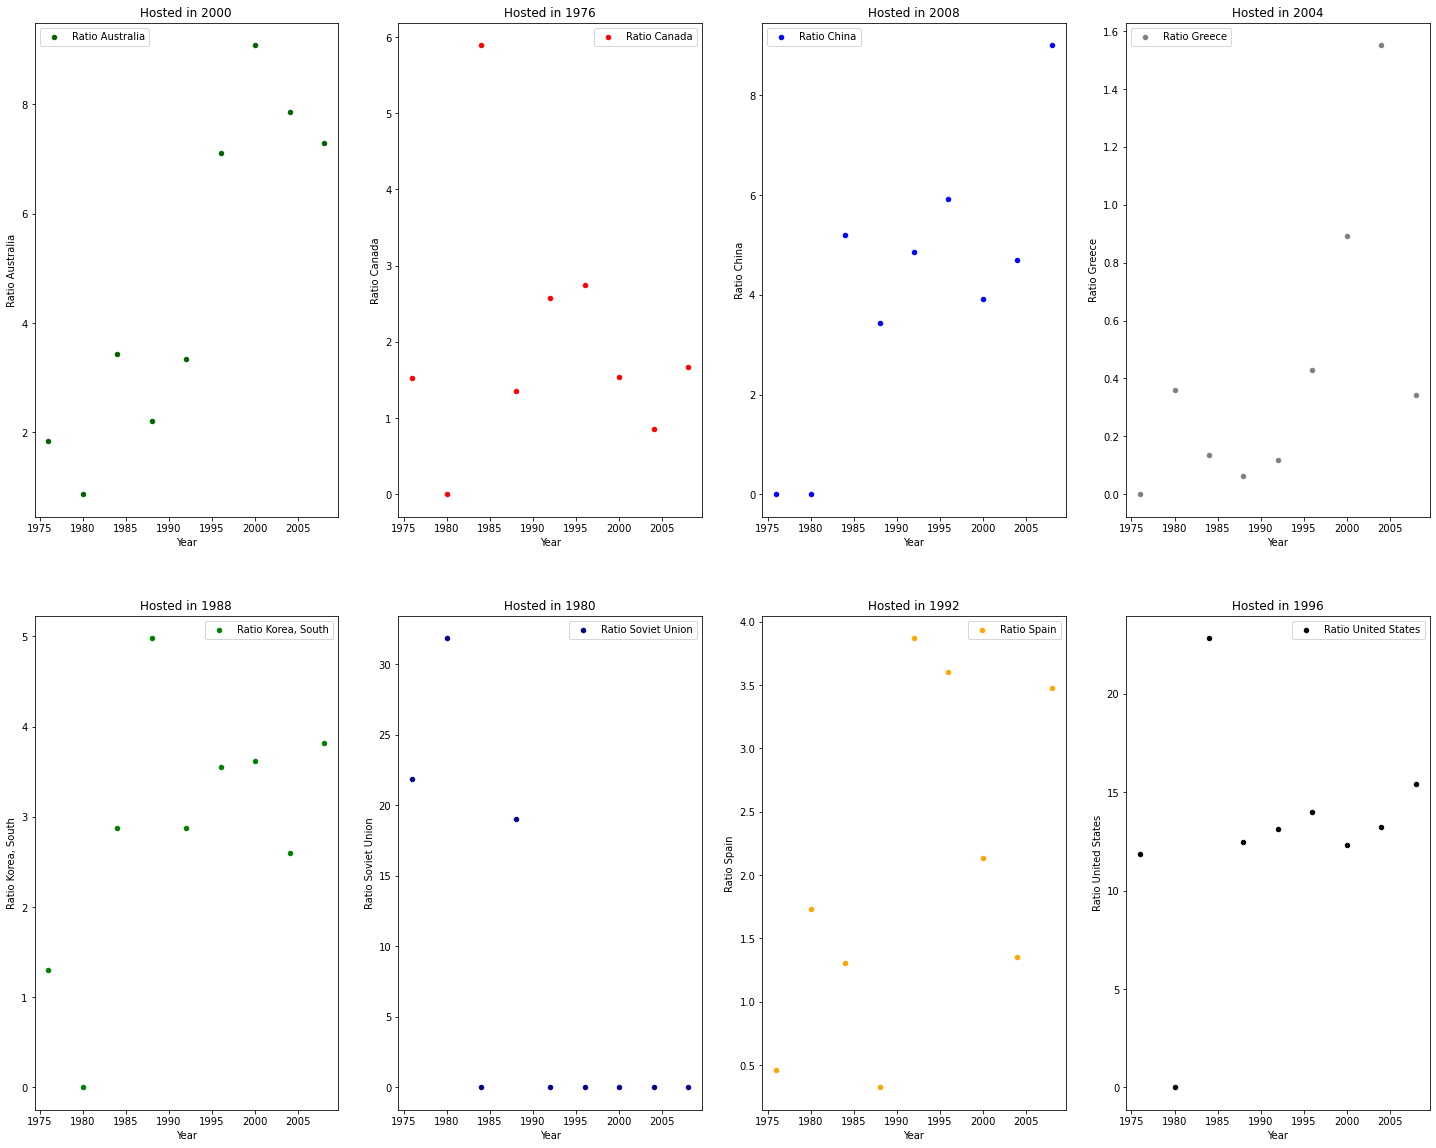

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=4)
Home_A_Ratio.plot.scatter(title= "Hosted in 2000" , x="Year", y="Ratio Australia", color="DarkGreen", label="Ratio Australia",ax=axes[0][0],figsize=(25,20))
Home_A_Ratio.plot.scatter(title= "Hosted in 1976" , x="Year", y="Ratio Canada", color="Red", label="Ratio Canada",ax=axes[0][1],figsize=(25,20))
Home_A_Ratio.plot.scatter(title= "Hosted in 2008" , x="Year", y="Ratio China", color="Blue", label="Ratio China",ax=axes[0][2],figsize=(25,20))
Home_A_Ratio.plot.scatter(title= "Hosted in 2004" , x="Year", y="Ratio Greece", color="Gray", label="Ratio Greece",ax=axes[0][3],figsize=(25,20))
Home_A_Ratio.plot.scatter(title= "Hosted in 1988" , x="Year", y="Ratio Korea, South", color="Green", label="Ratio Korea, South",ax=axes[1][0],figsize=(25,20))
Home_A_Ratio.plot.scatter(title= "Hosted in 1980" , x="Year", y="Ratio Soviet Union", color="DarkBlue", label="Ratio Soviet Union",ax=axes[1][1],figsize=(25,20))
Home_A_Ratio.plot.scatter(title= "Hosted in 1992" , x="Year", y="Ratio Spain", color="Orange", label="Ratio Spain",ax=axes[1][2],figsize=(25,20))
Home_A_Ratio.plot.scatter(title= "Hosted in 1996" , x="Year", y="Ratio United States", color="Black", label="Ratio United States",ax=axes[1][3],figsize=(25,20))


### Conclusion 3: As can be seen, in seven of the eight cases we examined we see a significant advantage for the host group.So the bottom line is if we want to see more medals in Israel, bring the Olympics to the Holy Land!! :) 

In [19]:
from IPython.core.display import Image
Image(url= "https://img.mako.co.il/2012/08/13/316223_C.jpg", width=800, height=650)

In [37]:
import pandas as pd
import numpy as np
import os
from datetime import date # get python datetime
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error as mse

In [38]:
clasi=AI_project[(AI_project['City']=='Montreal')&(AI_project['Sport']=='Aquatics')]
clasi

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze
...,...,...,...,...,...,...,...,...,...,...,...
154,Montreal,1976,Aquatics,Water polo,water polo,"FARAGO, Tamas",Men,HUN,Hungary,M,Gold
155,Montreal,1976,Aquatics,Water polo,water polo,"HOEPELMAN, Andries",Men,NED,Netherlands,M,Bronze
156,Montreal,1976,Aquatics,Water polo,water polo,"GHIBELLINI, Alessandro",Men,ITA,Italy,M,Silver
157,Montreal,1976,Aquatics,Water polo,water polo,"D, Vincenzo",Men,ITA,Italy,M,Silver


In [39]:
clasi['Discipline_cat'] = clasi['Discipline'].astype('category').cat.codes
clasi['Country_cat'] = clasi['Country'].astype('category').cat.codes
clasi['Gender_cat'] = clasi['Gender'].astype('category').cat.codes
clasi['Medal_cat'] = clasi['Medal'].astype('category').cat.codes
fet=['Gender_cat','Country_cat','Discipline_cat','Medal_cat']
clasi[fet].corr()

<ipython-input-39-0e867a55414e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clasi['Discipline_cat'] = clasi['Discipline'].astype('category').cat.codes
<ipython-input-39-0e867a55414e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clasi['Country_cat'] = clasi['Country'].astype('category').cat.codes
<ipython-input-39-0e867a55414e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

,Gender_cat,Country_cat,Discipline_cat,Medal_cat
Gender_cat,1.000000e+00,-0.352235,-3.573275e-01,-1.748437e-18
Country_cat,-3.522352e-01,1.000000,-2.463445e-01,0.000000e+00
Discipline_cat,-3.573275e-01,-0.246344,1.000000e+00,3.318908e-18
Medal_cat,-1.748437e-18,0.000000,3.318908e-18,1.000000e+00


In [44]:
features =['Gender_cat','Discipline_cat','Medal_cat']
X = clasi[features]
y = clasi['Country']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=1) 

In [54]:
from sklearn import tree
dt = sk.tree.DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
acc = sk.metrics.accuracy_score(pred, y_test)
print(dt.get_depth())
acc

5


0.6458333333333334

In [48]:
def get_acc(model,max_depth, train_X, test_X, train_y, test_y):
    model = sk.tree.DecisionTreeClassifier(criterion="gini", max_depth=max_depth, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(test_X)
    acc = sk.metrics.accuracy_score(preds_val, test_y)
    return(acc)

In [52]:
get_acc(dt,3,X_train, X_test, y_train, y_test)

0.6875

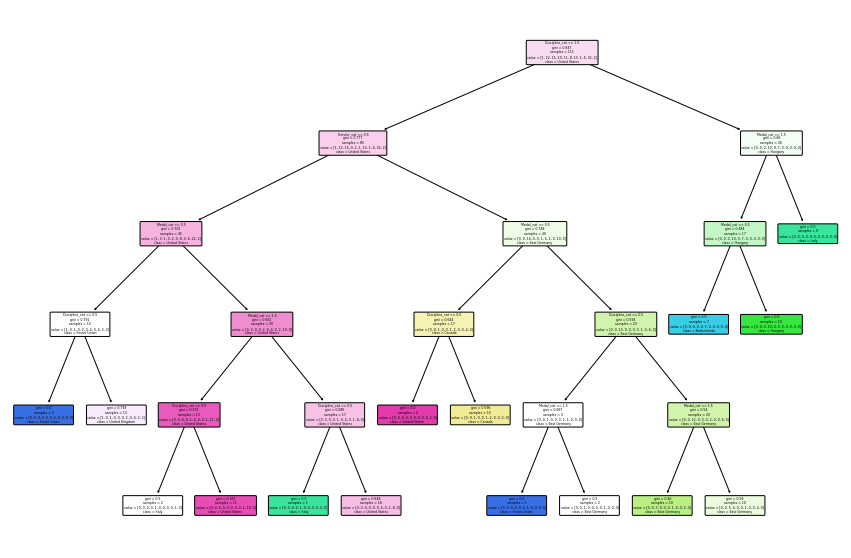

In [56]:
fig = plt.figure(figsize=(15,10))

tree.plot_tree(dt, 
               feature_names = features, 
               class_names = dt.classes_,
               filled=True, 
               rounded = True)  
plt.show()